<center><h1>Regressions</h1></center>

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
import warnings
%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)

Get the Cycle Power Plant Data Set

In [2]:
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')
print(df)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]


### (b) Exploring the data

#### i. rows and columns

In [3]:
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 9568
Number of columns: 5


Data in a row describe a single entity in the dataset. Data in a column describe one feature of the entire dataset. There are five columns in this dataset. Four of them are hourly average ambient variable include Temperature (AT), Exhaust Vacuum (V), Ambient Pressure (AP), Relative Humidity (RH) and the last one is the net hourly electrical Energy Output (EP) of the plant, which we want to predict using the first four predictors. 

#### ii. pairwise scatterplots of all the varianbles

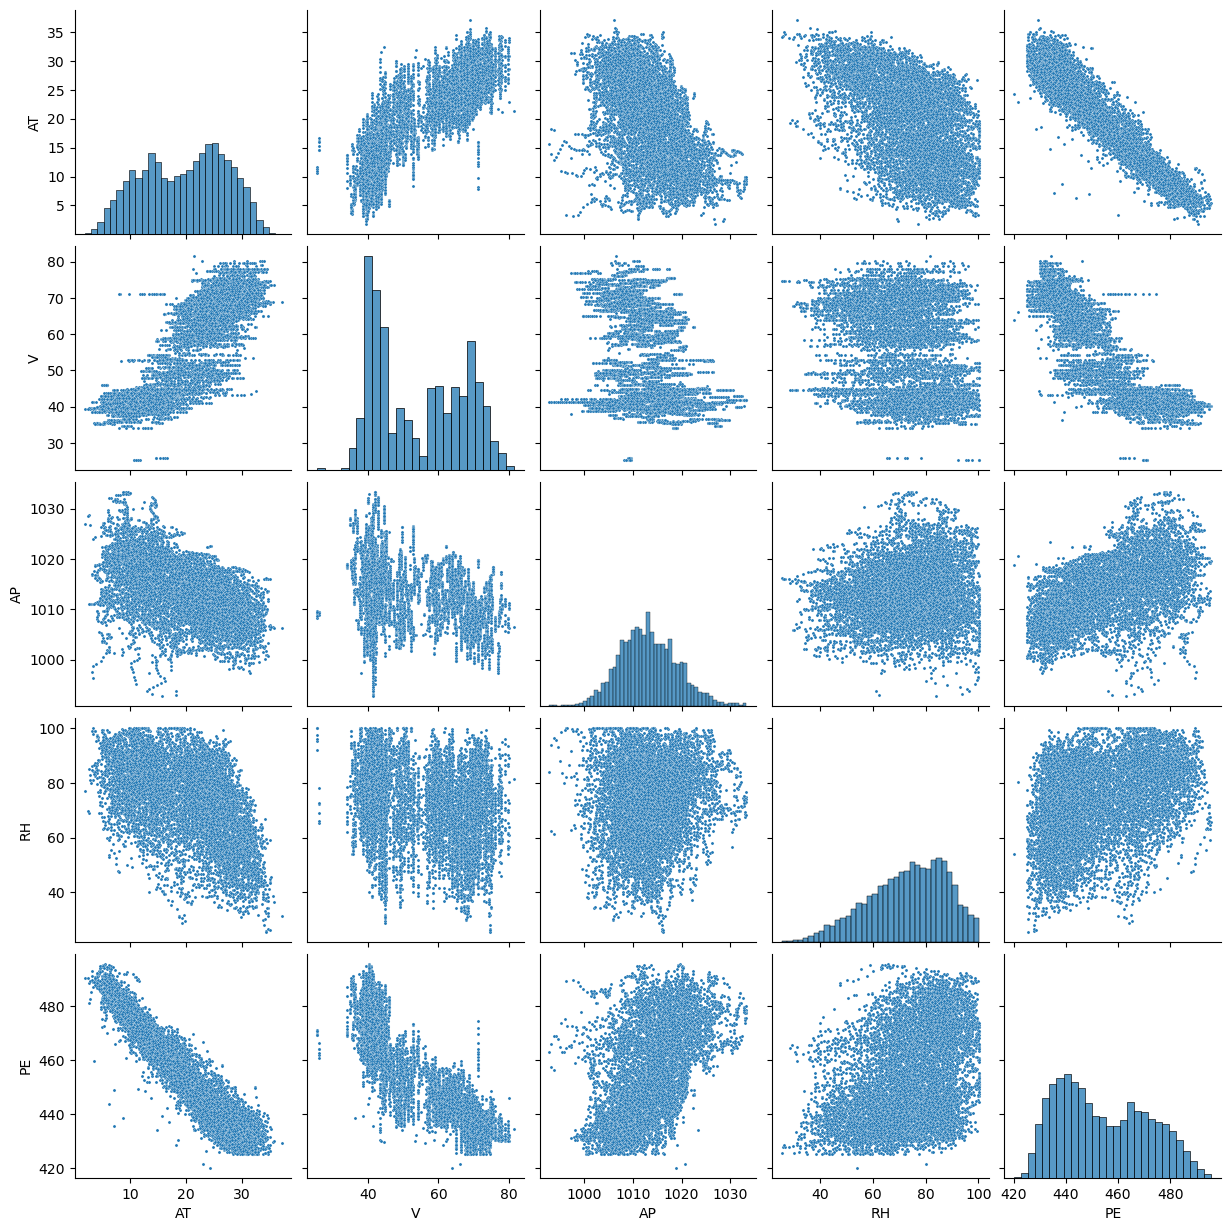

In [4]:
sns.pairplot(df, plot_kws={"s": 5})
plt.show()

From the pairwise scatterplot, we could see that Temperature (AT) seems to have the strongest correlation with energy output (PE), while Relative Humidity seems to have the weakest correlation with energy output (PE). In addition, Temperature (AT) and Exhaust Vacuum (V) seems to have a correlation.

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [5]:
df_summary = pd.DataFrame({'Mean': df.mean(),
                           'Median': df.median(),
                           'Range': df.max()-df.min(),
                           'First Quartiles': df.quantile(0.25),
                           'Third Quartiles': df.quantile(0.75),
                           'IQR': df.quantile(0.75)-df.quantile(0.25)})
print(df_summary)

           Mean    Median  Range  First Quartiles  Third Quartiles      IQR
AT    19.651231    20.345  35.30          13.5100            25.72  12.2100
V     54.305804    52.080  56.20          41.7400            66.54  24.8000
AP  1013.259078  1012.940  40.41        1009.1000          1017.26   8.1600
RH    73.308978    74.975  74.60          63.3275            84.83  21.5025
PE   454.365009   451.550  75.50         439.7500           468.43  28.6800


### (c) Simple Linear Regression

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:50:48   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177.280      0.0

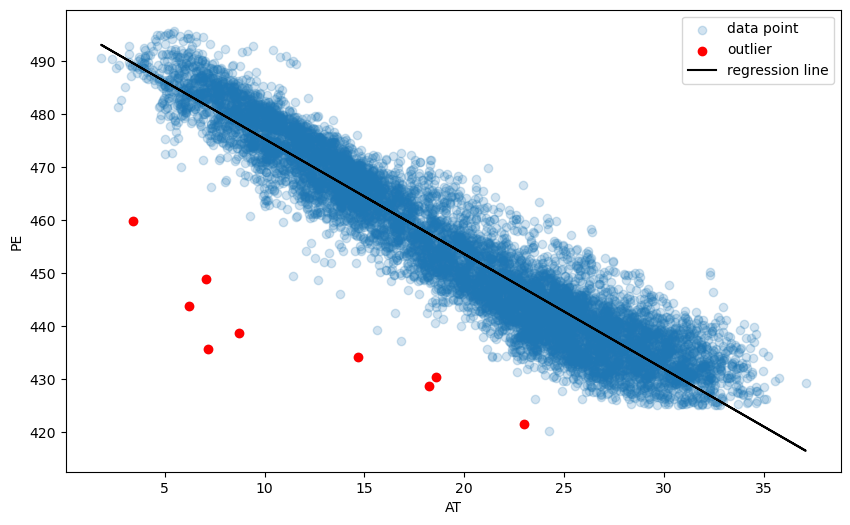

In [6]:
import statsmodels.api as sm

y = df['PE']

# Temperature (AT)
X_AT = df['AT']
X_AT2 = sm.add_constant(X_AT)
model_AT = sm.OLS(y, X_AT2).fit()
y_pred_AT = model_AT.predict(X_AT2) 
print(model_AT.summary())
test_AT = model_AT.outlier_test()
outliers_AT = test_AT[test_AT['bonf(p)'] < 0.05]
outliers_AT = df[df.index.isin(outliers_AT.index)]

plt.figure(figsize=(10, 6))
plt.scatter(X_AT, y, alpha=0.2, label='data point')
plt.scatter(outliers_AT['AT'], outliers_AT['PE'], c='r', label='outlier')
plt.plot(X_AT, y_pred_AT, color='k', label='regression line')
plt.xlabel('AT')
plt.ylabel('PE')
plt.legend()
plt.show()

For the linear regression model of AT predicting PE, we could see the p-value is close to 0, which means the association is statistically significant. In addition, the R squared is 0.899, which implies that 89.9% of the variability of the dependent variable in the dataset is explained by the variance of the independent variable.

In this regression task, there are 9 outliers.

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:51:06   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015      0.378   1370.218      0.0

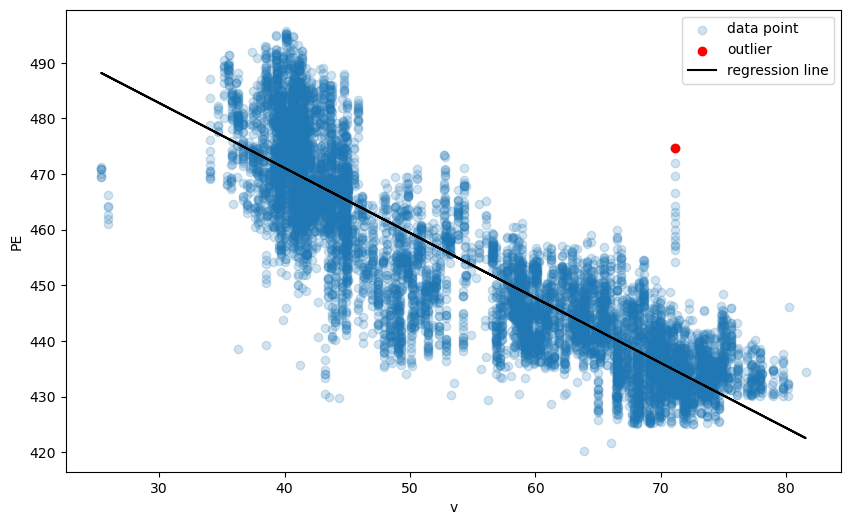

In [7]:
# Exhaust Vacuum (V)
X_V = df['V']
X_V2 = sm.add_constant(X_V)
model_V = sm.OLS(y, X_V2).fit()
y_pred_V = model_V.predict(X_V2)
print(model_V.summary())
test_V = model_V.outlier_test()
outliers_V = test_V[test_V['bonf(p)'] < 0.05]
outliers_V = df[df.index.isin(outliers_V.index)]

plt.figure(figsize=(10, 6))
plt.scatter(X_V, y, alpha=0.2, label='data point')
plt.scatter(outliers_V['V'], outliers_V['PE'], c='r', label='outlier')
plt.plot(X_V, y_pred_V, color='k', label='regression line')
plt.xlabel('v')
plt.ylabel('PE')
plt.legend()
plt.show()

For the linear regression model of V predicting PE, we could see the p-value is close to 0, which means the association is statistically significant. In addition, the R squared is 0.757, which implies that 75.7% of the variability of the dependent variable in the dataset is explained by the variance of the independent variable.

In this regression task, there is one outlier.

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:51:25   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610     25.459    -41.449      0.0

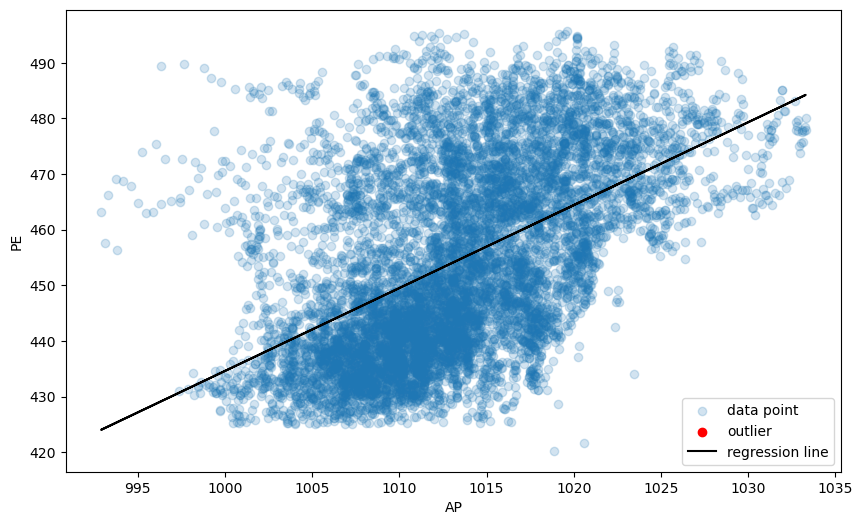

In [8]:
# Ambient Pressure (AP)
X_AP = df['AP']
X_AP2 = sm.add_constant(X_AP)
model_AP = sm.OLS(y, X_AP2).fit()
y_pred_AP = model_AP.predict(X_AP2)
print(model_AP.summary())
test_AP = model_AP.outlier_test()
outliers_AP = test_AP[test_AP['bonf(p)'] < 0.05]
outliers_AP = df[df.index.isin(outliers_AP.index)]

plt.figure(figsize=(10, 6))
plt.scatter(X_AP, y, alpha=0.2, label='data point')
plt.scatter(outliers_AP['AP'], outliers_AP['PE'], c='r', label='outlier')
plt.plot(X_AP, y_pred_AP, color='k', label='regression line')
plt.xlabel('AP')
plt.ylabel('PE')
plt.legend()
plt.show()

For the linear regression model of AP predicting PE, we could see the p-value is close to 0, which means the association is statistically significant. However, the R squared is 0.269, which implies that 26.9% of the variability of the dependent variable in the dataset is explained by the variance of the independent variable.

In this regression task, there is no outlier.

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:51:43   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618      0.823    511.676      0.0

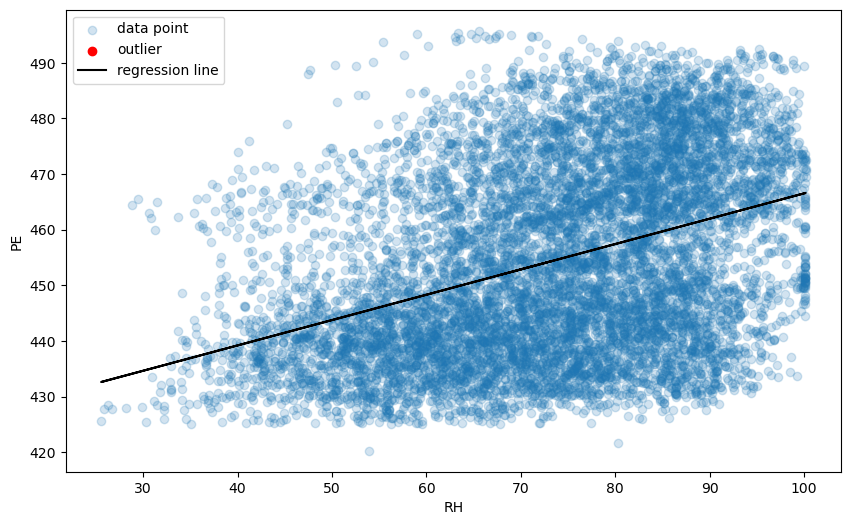

In [9]:
# Relative Humidity (RH)
X_RH = df['RH']
X_RH2 = sm.add_constant(X_RH)
model_RH = sm.OLS(y, X_RH2).fit()
y_pred_RH = model_RH.predict(X_RH2)
print(model_RH.summary())
test_RH = model_RH.outlier_test()
outliers_RH = test_RH[test_RH['bonf(p)'] < 0.05]
outliers_RH = df[df.index.isin(outliers_RH.index)]

plt.figure(figsize=(10, 6))
plt.scatter(X_RH, y, alpha=0.2, label='data point')
plt.scatter(outliers_RH['RH'], outliers_RH['PE'], c='r', label='outlier')
plt.plot(X_RH, y_pred_RH, color='k', label='regression line')
plt.xlabel('RH')
plt.ylabel('PE')
plt.legend()
plt.show()

For the linear regression model of RH predicting PE, we could see the p-value is close to 0, which means the association is statistically significant. However, the R squared is 0.152, which implies that 15.2% of the variability of the dependent variable in the dataset is explained by the variance of the independent variable.

In this regression task, there is no outlier.

In summary, all four models have statistically significant association, but the last two models have low R squared values.

### (d) Multiple Regression

In [10]:
X_multiple = df.iloc[:, :-1]
X_multiple = sm.add_constant(X_multiple)
model_multiple = sm.OLS(y, X_multiple).fit()
y_pred_multiple = model_multiple.predict(X_multiple) 
print(model_multiple.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:51:59   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

From the regression result summary table, we could see the p-value for all predictos are close to 0, and the R squared (0.929) is higher than all the simple linear regression. Therefore, we could reject all the null hypothesis.

### (e) 1c Compare to 1d

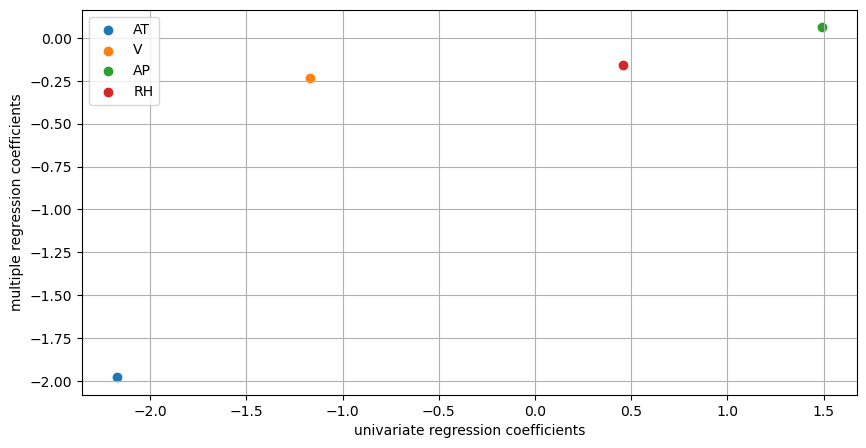

In [11]:
coef_single = [model_AT.params[1], model_V.params[1], model_AP.params[1], model_RH.params[1]]
coef_multiple = model_multiple.params[1:]

fig, ax = plt.subplots(figsize=(10, 5))
for i in range(len(coef_single)):
    ax.scatter(coef_single[i], coef_multiple[i], label=coef_multiple.index[i])

ax.legend()
plt.xlabel('univariate regression coefficients')
plt.ylabel('multiple regression coefficients')
ax.grid(True)
plt.show()

### (f) Nonlinear Association

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)

# Temperature (AT)
X_AT_reshape = df['AT'].values.reshape(-1, 1)
X_AT_poly = poly.fit_transform(X_AT_reshape)
model_AT_poly = sm.OLS(y, X_AT_poly).fit()

print(model_AT_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:52:00   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

From the regression result summary, we could see that the p-values are close to 0, which indicates there is evidence of nonlinear association.

In [13]:
# Exhaust Vacuum (V)
X_V_reshape = df['V'].values.reshape(-1, 1)
X_V_poly = poly.fit_transform(X_V_reshape)
model_V_poly = sm.OLS(y, X_V_poly).fit()

print(model_V_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:52:00   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.0

From the regression result summary, we could see that the p-values of x^2 and x^3 are relatively large, which indicates there is not enough evidence of nonlinear association.

In [14]:
# Ambient Pressure (AP) 
X_AP_reshape = df['AP'].values.reshape(-1, 1)
X_AP_poly = poly.fit_transform(X_AP_reshape)
model_AP_poly = sm.OLS(y, X_AP_poly).fit()

print(model_AP_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:52:00   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0747      0.009      8.415      0.0

From the regression result summary, we could see that the p-values are all close to 0, which indicates there is evidence of nonlinear association.

In [15]:
# Relative Humidity (RH)
X_RH_reshape = df['RH'].values.reshape(-1, 1)
X_RH_poly = poly.fit_transform(X_RH_reshape)
model_RH_poly = sm.OLS(y, X_RH_poly).fit()

print(model_RH_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:52:00   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        468.4135     10.545     44.422      0.0

From the regression result summary, we could see that the p-values are all close to 0, which indicates there is evidence of nonlinear association.

### (g) Interactions of Predictors

In [16]:
import statsmodels.formula.api as smf
interaction_formula = 'PE ~ AT * V + AT * AP + AT * RH + V * AP + V * RH + AP * RH'
model_interaction = smf.ols(formula=interaction_formula, data=df).fit()
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:52:00   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

The main effects V, AP, RH and the interaction term AT:V, AT:RH, V:AP, AP:RH are considered statistically significant since their p-value is smaller than 0.05. In addition, AT:AP has the largest p-value of 0.452.

The R-squared is 0.936, which is higher than 0.929 from the multiple linear regression model without an interaction terms. (93.6% - 92.9%)/(100% - 92.9%) = 9.86% of the variability in PE that remains after fitting the multiple linear regression model could be explained by the interaction terms.

### (h) Improvement

In [17]:
# Split training and test data 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
training = pd.concat([X_train, y_train], axis=1, sort=True)

In [18]:
# Regression model with all predictors
model_all = smf.ols(formula='PE ~ AT + V + AP + RH', data=training).fit()
print(model_all.summary())

y_pred_all_train = model_all.predict(X_train)
y_pred_all_test = model_all.predict(X_test)
mse_all_train = mean_squared_error(y_train, y_pred_all_train)
mse_all_test = mean_squared_error(y_test, y_pred_all_test)

print('\ntrain MSE:', mse_all_train)
print('test MSE:', mse_all_test)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.194e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:52:00   Log-Likelihood:                -19630.
No. Observations:                6697   AIC:                         3.927e+04
Df Residuals:                    6692   BIC:                         3.930e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    467.8414     11.502     40.673      0.0

In [19]:
# Regression model with all predictors, all interaction terms, and quadratic nonlinearities
model_all2 = smf.ols(formula='PE ~ AT + V + AP + RH + np.power(AT, 2) + np.power(V, 2) + np.power(AP, 2) + np.power(RH, 2) + AT:V + AT:AP + AT:RH + V:AP + V:RH + AP:RH', data=training).fit()
print(model_all2.summary())

y_pred_all_train2 = model_all2.predict(X_train)
y_pred_all_test2 = model_all2.predict(X_test)
mse_all_train2 = mean_squared_error(y_train, y_pred_all_train2)
mse_all_test2 = mean_squared_error(y_test, y_pred_all_test2)

print('\ntrain MSE:', mse_all_train2)
print('test MSE:', mse_all_test2)

vars_all = model_all2.params
insigniﬁcant_vars = []
for i in range(len(model_all2.params)):
    if model_all2.pvalues[i] > 0.05:
        insigniﬁcant_vars.append(vars_all.index[i])

print('\ninsignificant variables:', insigniﬁcant_vars)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7272.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:52:00   Log-Likelihood:                -19160.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6682   BIC:                         3.845e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -7664.9809   1429.568     

In [20]:
# Remove insigniﬁcant variables using p-values
model_all3 = smf.ols(formula='PE ~ AT + V + AP + RH + np.power(AT, 2) + np.power(AP, 2) + np.power(RH, 2) + AT:V + AT:RH + AP:RH', data=training).fit()
print(model_all3.summary())

y_pred_all_train3 = model_all3.predict(X_train)
y_pred_all_test3 = model_all3.predict(X_test)
mse_all_train3 = mean_squared_error(y_train, y_pred_all_train3)
mse_all_test3 = mean_squared_error(y_test, y_pred_all_test3)
print('\ntrain MSE:', mse_all_train3)
print('test MSE:', mse_all_test3)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.017e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        09:52:00   Log-Likelihood:                -19166.
No. Observations:                6697   AIC:                         3.835e+04
Df Residuals:                    6686   BIC:                         3.843e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.046e+04   1091.512     

V is not removed even though its p-value is large in the previous model, because we still keep interaction terms related to V. It will be hard to interpret interaction without the main effect based on the hierarchical principle.

### (i) KNN

k = 5 is the best fit using raw features 
Training MSE = 10.600768887561596 
Test MSE = 15.726819842563568


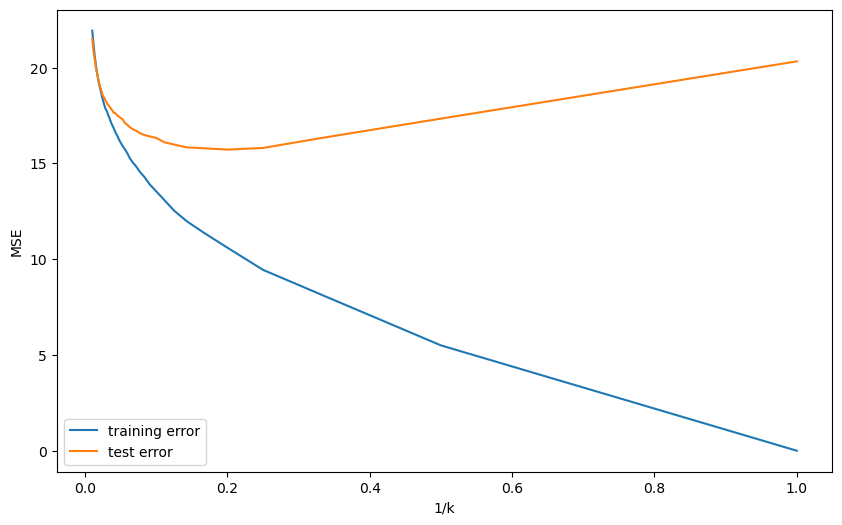

In [21]:
from sklearn.neighbors import KNeighborsRegressor

# KNN regression using raw features
neighbors = range(1, 101)
train_error = []
test_error = []
k_best = 0
best_mse_train = 100
best_mse_test = 100
for k in neighbors:
    knn_raw = KNeighborsRegressor(n_neighbors=k)
    knn_raw.fit(X_train, y_train)
    y_pred_knn_train = knn_raw.predict(X_train)
    y_pred_knn_test = knn_raw.predict(X_test)
    mse_train = mean_squared_error(y_train, y_pred_knn_train)
    mse_test = mean_squared_error(y_test, y_pred_knn_test)
    train_error.append(mse_train)
    test_error.append(mse_test)
    if mse_test < best_mse_test:
        best_mse_test = mse_test
        best_mse_train = mse_train
        k_best = k
        
print('k =', k_best, 'is the best fit using raw features', 
      '\nTraining MSE =', best_mse_train, 
      '\nTest MSE =', best_mse_test)

k_inverse = [1/k for k in neighbors]

plt.figure(figsize=(10, 6))
plt.plot(k_inverse, train_error, label='training error')
plt.plot(k_inverse, test_error, label='test error')
plt.legend()
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.show()

k = 9 is the best fit using normalized features 
Training MSE = 11.814074952669058 
Test MSE = 17.03372663114757


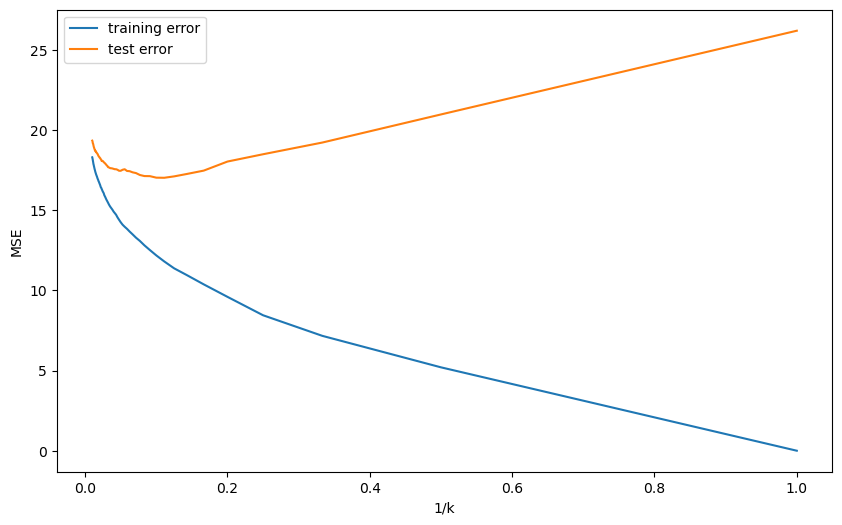

In [22]:
# KNN regression using normalized features
from sklearn.preprocessing import MinMaxScaler
X_train_normalized = MinMaxScaler().fit(X_train).transform(X_train)
X_test_normalized = MinMaxScaler().fit(X_test).transform(X_test)

train_error_normalized = []
test_error_normalized = []
k_best_normalized = 0
best_mse_train_normalized = 100
best_mse_test_normalized = 100
for k in neighbors:
    knn_normalized = KNeighborsRegressor(n_neighbors=k)
    knn_normalized.fit(X_train_normalized, y_train)
    y_pred_knn_train = knn_normalized.predict(X_train_normalized)
    y_pred_knn_test = knn_normalized.predict(X_test_normalized)
    mse_train = mean_squared_error(y_train, y_pred_knn_train)
    mse_test = mean_squared_error(y_test, y_pred_knn_test)
    train_error_normalized.append(mse_train)
    test_error_normalized.append(mse_test)
    if mse_test < best_mse_test_normalized:
        best_mse_test_normalized = mse_test
        best_mse_train_normalized = mse_train
        k_best_normalized = k

print('k =', k_best_normalized, 'is the best fit using normalized features', 
      '\nTraining MSE =', best_mse_train_normalized, 
      '\nTest MSE =', best_mse_test_normalized)

plt.figure(figsize=(10, 6))
plt.plot(k_inverse, train_error_normalized, label='training error')
plt.plot(k_inverse, test_error_normalized, label='test error')
plt.legend()
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.show()

### (j) Compare KNN and Linear

In [23]:
mse_df = pd.DataFrame({'Test MSE':[mse_all_test, mse_all_test2, mse_all_test3, 
                                   best_mse_test, best_mse_test_normalized]},
                      index=['LR (all predictors)', 
                             'LR (all predictors, interactions, and quadratic nonlinearities)', 
                             'LR (removed insigniﬁcant variables)',
                             'KNN (raw features)', 
                             'KNN (normalized features)'])
print(mse_df)

                                                     Test MSE
LR (all predictors)                                 21.239857
LR (all predictors, interactions, and quadratic...  18.647312
LR (removed insigniﬁcant variables)                 18.694346
KNN (raw features)                                  15.726820
KNN (normalized features)                           17.033727


From all the five models, KNN regression using raw features has the smallest test error. 

Overall, KNN regression seems to perform better than linear regression based on test MSE. The possible reason is that linear regression assumes linear relationship between the predictors and the response, which might not work well because of the complexity of this dataset. 

Between two KNN regressions, the KNN using raw features perform better while the KNN using min-max scaler does not perform as expected. One possible reason could be the presence of outliers. 

## References

<ul>
	<li><a href="https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html">Pandas .read_excel</a></li>
    <li><a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html">Pandas DataFrame quantile</a></li>
    <li><a href="https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS">statsmodels linear model</a></li>
    <li><a href="https://notebook.community/samuelsinayoko/kaggle-housing-prices/research/outlier_detection_statsmodels">statsmodels outlier detection</a></li>
    <li><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html">matplotlib scatter plot</a></li>
    <li><a href="https://stackoverflow.com/questions/58220589/marking-outliers-on-a-scatter-plot">Plotting outliers on scatter plot</a></li>
    <li><a href="https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_with_legend.html">Scatter plot loop</a></li>
    <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html">sklearn PolynomialFeatures</a></li>
    <li><a href="https://www.statsmodels.org/dev/example_formulas.html">statsmodels example of using formulas</a></li>
    <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html">sklearn mean squared error</a></li>
    <li><a href="https://stackoverflow.com/questions/31978948/python-stats-models-quadratic-term-in-regression">statsmodels add quadratic terms in formula</a></li>
    <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html">sklearn knn regression</a></li>
    <li><a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">sklearn MinMaxScaler</a></li>
</ul>
